In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    text = text.lower()
    text = ''.join(c for c in text if c.isalpha() or c.isspace())
    doc = nlp(text)
    text = [token.lemma_ for token in doc]
    return ' '.join(text)

df['cleanedtext'] = df['text'].apply(lambda x: clean_text(x.lower()))
df.head(5)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
4.6748169399999995
GPU (s):
0.0891024370000082
GPU speedup over CPU: 52x


In [ ]:
import spacy
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv('/content/fake_papers_train_part_public.csv')
df = df.drop(columns = ['id'], axis = 1)
print(df.shape)
df.head()

(5350, 2)


,text,fake
0,Modern two-dimensional imaging is of such qual...,0
1,Background: The optimal sequence of systemic p...,1
2,This chapter opens with a discussion of the ef...,1
3,The time scale of the ultra-short-term can str...,1
4,Electronic nose or machine olfaction are syste...,1


###Preprocessing and importing libraries

In [ ]:
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize using spacy
    doc = nlp(text)

    # Lemmatize
    text = [token.lemma_ for token in doc ]

    return ' '.join(text)

df['cleanedtext'] = df['text'].apply(lambda x: clean_text(x.lower()))
df.head(10)

,text,fake,cleanedtext
0,Modern two-dimensional imaging is of such qual...,0,modern two - dimensional imaging be of such qu...
1,Background: The optimal sequence of systemic p...,1,background : the optimal sequence of systemic ...
2,This chapter opens with a discussion of the ef...,1,this chapter open with a discussion of the eff...
3,The time scale of the ultra-short-term can str...,1,the time scale of the ultra - short - term can...
4,Electronic nose or machine olfaction are syste...,1,electronic nose or machine olfaction be system...
5,"In this paper, the aim of the study is to dete...",1,"in this paper , the aim of the study be to det..."
6,Basell has acquired German steam cracker Ruhr ...,0,basell have acquire german steam cracker ruhr ...
7,"In this paper, Shimerdas and his co-workers ex...",1,"in this paper , shimerda and his co - worker e..."
8,Metastatic malignant melanoma is an incurable ...,0,metastatic malignant melanoma be an incurable ...
9,"In this paper, the authors describe a new faul...",1,"in this paper , the author describe a new faul..."


1 stands for the generated content and 0 stands for human-written content.

In [ ]:
import numpy as np
np.random.seed(42)

In [ ]:
X = list(df['cleanedtext'])
y = list(df['fake'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
CMD = ConfusionMatrixDisplay
from sklearn.metrics import classification_report
CR = classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params consists of different set of hyperparameters for every model

##Decision Trees

Validation Performance with every set of hyperparameters using Grid Search CV

Then, test set performance for best parameters

Lastly Confusion Matrix

Parameters:  {'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Mean accuracy on validation set:  0.705373831775701
Parameters:  {'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}
Mean accuracy on validation set:  0.705373831775701
Parameters:  {'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}
Mean accuracy on validation set:  0.705373831775701
Parameters:  {'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 15}
Mean accuracy on validation set:  0.705373831775701
Parameters:  {'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 20}
Mean accuracy on validation set:  0.705373831775701
Parameters:  {'clf__max_depth': 1, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2}
Mean accuracy on validation set:  0.705373831775701
Parameters:  {'clf__max_depth': 1, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 5}
Mean accuracy on validation set:  0.70537

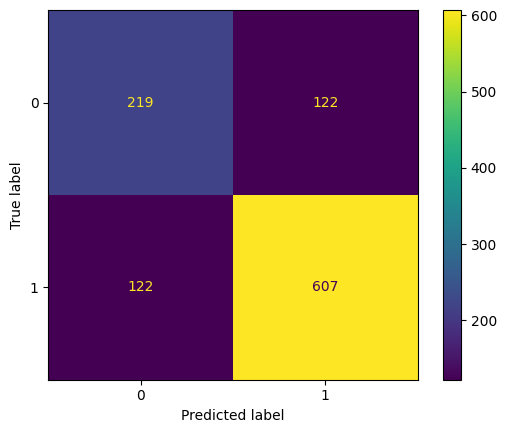

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

#pipeline for feature extraction using Tfidf and decision tree model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

#important hyperparameters
params = {
    'clf__max_depth': [1,3,5,7],
    'clf__min_samples_split': [2,5,10,15,20],
    'clf__min_samples_leaf': [1,3,7,10]
}

# Split the data into training and test sets
X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.2)

# Usng GridSearchCV to tune hyperparameters and select the best model
grid_search = GridSearchCV(pipeline, params, cv=4)
grid_search.fit(X_val_train, y_val_train)

#results of the grid search
results = grid_search.cv_results_

#performance for each set of hyperparameters
for i in range(len(results['params'])):
    print("Parameters: ", results['params'][i])
    print("Mean accuracy on validation set: ", results['mean_test_score'][i])

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Test Accuracy: {accuracy:.4f}')
CMD.from_predictions(y_test,y_pred)
print(CR(y_test,y_pred))

In [ ]:
grid_search.score(X_val_train,y_val_train)

0.7871495327102803

In [ ]:
grid_search.score(X_test,y_test)

0.77196261682243

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=3,
                                        min_samples_split=15,
                                        random_state=42))])

Best values of Decision Trees Hyperparameters

In [ ]:
grid_search.best_params_

{'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 15}

##Random Forest

Parameters:  {'clf__max_depth': 2, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Mean accuracy on validation set:  0.6822429906542056
Parameters:  {'clf__max_depth': 2, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4}
Mean accuracy on validation set:  0.6822429906542056
Parameters:  {'clf__max_depth': 2, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 6}
Mean accuracy on validation set:  0.6822429906542056
Parameters:  {'clf__max_depth': 2, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8}
Mean accuracy on validation set:  0.6822429906542056
Parameters:  {'clf__max_depth': 2, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}
Mean accuracy on validation set:  0.6822429906542056
Parameters:  {'clf__max_depth': 2, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 20}
Mean accuracy on validation set:  0.6822429906542056
Parameters:  {'clf__max_depth': 2, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Mean accuracy on validation set:  0.

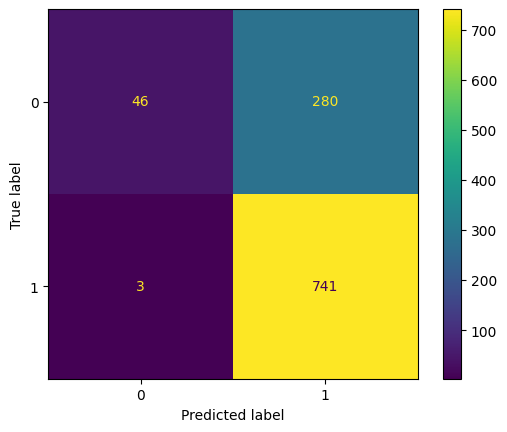

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#pipeline for feature extraction using Tfidf and random forest model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

#hyperparameters to tune
params = {
    'clf__max_depth': [2, 4, 6, 8, 10],
    'clf__min_samples_split': [2, 4, 6, 8, 10,20],
    'clf__min_samples_leaf': [1, 2, 4, 6, 8]
}

# Split the data into training and test sets
X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.2)

# Use GridSearchCV to tune hyperparameters and select the best model
grid_search = GridSearchCV(pipeline, params, cv=4)
grid_search.fit(X_val_train, y_val_train)

#results of the grid search
results = grid_search.cv_results_

# Print the performance for each set of hyperparameters
for i in range(len(results['params'])):
    print("Parameters: ", results['params'][i])
    print("Mean accuracy on validation set: ", results['mean_test_score'][i])

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Test Accuracy: {accuracy:.4f}')
CMD.from_predictions(y_test,y_pred)
print(CR(y_test,y_pred))

In [ ]:
print(grid_search.score(X_val_train,y_val_train))
print(grid_search.score(X_test,y_test))
print(grid_search.best_params_)

0.7691588785046729
0.7355140186915888
{'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8}


In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=10, min_samples_split=8,
                                        random_state=42))])

##Logistic Regression

Training with different set of hyperparameters

In [ ]:
from sklearn.linear_model import LogisticRegression

#pipeline for feature extraction using Tfidf and logistic regression model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(random_state=42))
])

#hyperparameters to tune
params = {
    'clf__C': [ 0.01, 0.1, 1, 5, 8, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear', 'saga']
}

# Split the data into training and test sets
X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.2)

# Use GridSearchCV to tune hyperparameters and select the best model
grid_search = GridSearchCV(pipeline, params, cv=4,error_score=0)
grid_search.fit(X_val_train, y_val_train)

Validation performance comparison for hyperparameters

In [ ]:
# Get the results of the grid search
results = grid_search.cv_results_

# Print the performance metrics for each set of hyperparameters on validation set
for i in range(len(results['params'])):
    print("Parameters: ", results['params'][i])
    print("Mean accuracy on validation set: ", results['mean_test_score'][i])

Parameters:  {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Mean accuracy on validation set:  0.6855140186915887
Parameters:  {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Mean accuracy on validation set:  0.6855140186915887
Parameters:  {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Mean accuracy on validation set:  0.6855140186915887
Parameters:  {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Mean accuracy on validation set:  0.6855140186915887
Parameters:  {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Mean accuracy on validation set:  0.6855140186915887
Parameters:  {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Mean accuracy on validation set:  0.6855140186915887
Parameters:  {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Mean accuracy on validation set:  0.6855140186915887
Parameters:  {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Mean accuracy

Best hyperparameters with Test Accuracy and Confusion Matrix

Best Parameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Test Accuracy: 0.8542
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       340
           1       0.89      0.90      0.89       730

    accuracy                           0.85      1070
   macro avg       0.83      0.83      0.83      1070
weighted avg       0.85      0.85      0.85      1070



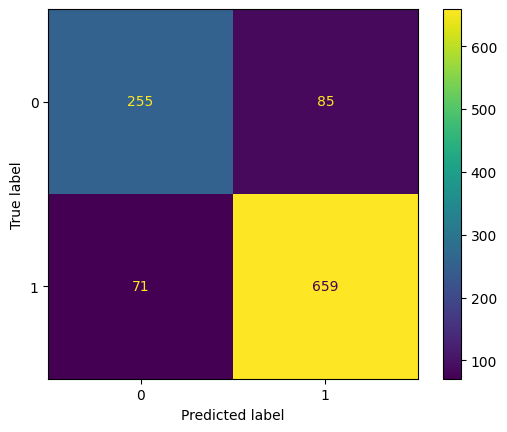

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Test Accuracy: {accuracy:.4f}')
CMD.from_predictions(y_test,y_pred)
print(CR(y_test,y_pred))

In [ ]:
grid_search.score(X_test,y_test)

0.8542056074766355

##KNN classifier

Training with different set of hyperparameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline for feature extraction and knn classifier model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())
])

# Define the hyperparameters to tune
params = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}

# Split the data into training and test sets
X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.2)

# Use GridSearchCV to tune hyperparameters and select the best model
grid_search = GridSearchCV(pipeline, params, cv=4,error_score=0)
grid_search.fit(X_val_train, y_val_train)

GridSearchCV(cv=4, error_score=0,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__metric': ['euclidean', 'manhattan'],
                         'clf__n_neighbors': [3, 5, 7],
                         'clf__weights': ['uniform', 'distance']})

Validation Performance

In [ ]:
# Get the results of the grid search
results = grid_search.cv_results_

# Print best parameters and best accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Print the performance metrics for each set of hyperparameters on validation set
for i in range(len(results['params'])):
    print("Parameters: ", results['params'][i])
    print("Mean accuracy on validation set: ", results['mean_test_score'][i])

Best parameters:  {'clf__metric': 'euclidean', 'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
Best accuracy score:  0.7182242990654206
Parameters:  {'clf__metric': 'euclidean', 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}
Mean accuracy on validation set:  0.7046728971962616
Parameters:  {'clf__metric': 'euclidean', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}
Mean accuracy on validation set:  0.7039719626168224
Parameters:  {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'uniform'}
Mean accuracy on validation set:  0.7130841121495327
Parameters:  {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
Mean accuracy on validation set:  0.7130841121495327
Parameters:  {'clf__metric': 'euclidean', 'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
Mean accuracy on validation set:  0.7182242990654206
Parameters:  {'clf__metric': 'euclidean', 'clf__n_neighbors': 7, 'clf__weights': 'distance'}
Mean accuracy on validation set:  0.717990

Best hyperparameters and Confusion matrix

Best Parameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
Test Accuracy: 0.7159
              precision    recall  f1-score   support

           0       0.66      0.21      0.32       339
           1       0.72      0.95      0.82       731

    accuracy                           0.72      1070
   macro avg       0.69      0.58      0.57      1070
weighted avg       0.70      0.72      0.66      1070



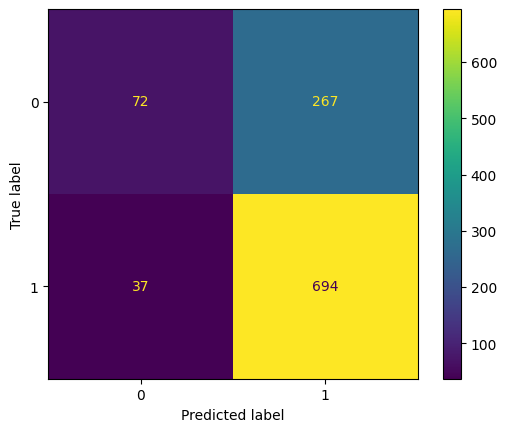

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Test Accuracy: {accuracy:.4f}')
CMD.from_predictions(y_test,y_pred)
print(CR(y_test,y_pred))

##1-Layer MLP


Training MLP classifier on different set of hyperparameters

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the pipeline for feature extraction and 1-layer MLP classifier model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MLPClassifier(warm_start = True,early_stopping=True))
])

# Define the hyperparameters to tune
params = {
    'clf__hidden_layer_sizes': [(16,), (128,), (256,)],
    'clf__activation': ['tanh', 'relu'],
    'clf__alpha': [0.001, 0.01, 0.1],
    'clf__learning_rate': ['invscaling']
}

# Split the data into training+validation and test sets
X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.2)

# Use GridSearchCV to tune hyperparameters and select the best model
grid_search = GridSearchCV(pipeline, params, cv=4,error_score=0)
grid_search.fit(X_val_train, y_val_train)

GridSearchCV(cv=4, error_score=0,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        MLPClassifier(early_stopping=True,
                                                      warm_start=True))]),
             param_grid={'clf__activation': ['tanh', 'relu'],
                         'clf__alpha': [0.001, 0.01, 0.1],
                         'clf__hidden_layer_sizes': [(16,), (128,), (256,)],
                         'clf__learning_rate': ['invscaling']})

Validation Performance comparison

In [ ]:
# Get the results of the grid search
results = grid_search.cv_results_

# Print the performance metrics for each set of hyperparameters on validation set
for i in range(len(results['params'])):
    print("Parameters: ", results['params'][i])
    print("Mean accuracy on validation set: ", results['mean_test_score'][i])

Parameters:  {'clf__activation': 'tanh', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (16,), 'clf__learning_rate': 'invscaling'}
Mean accuracy on validation set:  0.8128504672897197
Parameters:  {'clf__activation': 'tanh', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (128,), 'clf__learning_rate': 'invscaling'}
Mean accuracy on validation set:  0.822196261682243
Parameters:  {'clf__activation': 'tanh', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (256,), 'clf__learning_rate': 'invscaling'}
Mean accuracy on validation set:  0.8154205607476636
Parameters:  {'clf__activation': 'tanh', 'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (16,), 'clf__learning_rate': 'invscaling'}
Mean accuracy on validation set:  0.8196261682242991
Parameters:  {'clf__activation': 'tanh', 'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (128,), 'clf__learning_rate': 'invscaling'}
Mean accuracy on validation set:  0.825233644859813
Parameters:  {'clf__activation': 'tanh', 'clf__alpha': 0.01, 'clf__hidden_la

best hyperparameters

In [ ]:
best_model = grid_search.best_estimator_ #obtain the best estimator
best_params = grid_search.best_params_
print("Best Model: ",best_model)
print("Best Parameters: ", best_params)

Best Model:  Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 MLPClassifier(alpha=0.1, early_stopping=True,
                               hidden_layer_sizes=(128,),
                               learning_rate='invscaling', warm_start=True))])
Best Parameters:  {'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (128,), 'clf__learning_rate': 'invscaling'}


Test set performance for best hyperparameters and confusion matrix

Best Parameters: {'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (128,), 'clf__learning_rate': 'invscaling'}
Test Accuracy: 0.8411
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       342
           1       0.87      0.90      0.89       728

    accuracy                           0.84      1070
   macro avg       0.82      0.81      0.81      1070
weighted avg       0.84      0.84      0.84      1070



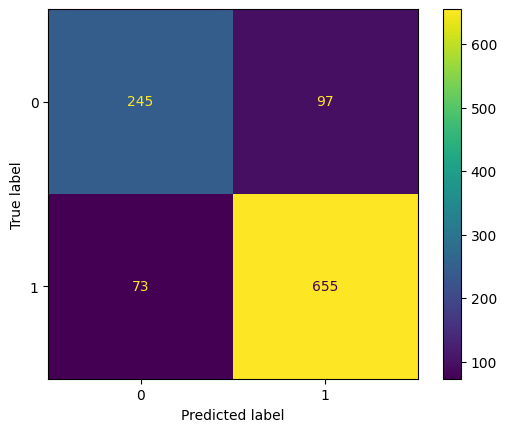

In [ ]:
# Evaluate the final model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Test Accuracy: {accuracy:.4f}')
CMD.from_predictions(y_test,y_pred)
print(CR(y_test,y_pred))

Accuracy :

Decision Trees = 77%

Random Forest = 73%

Logistic Regression = 85%

KNN = 71%

1-layer MLP = 84%



After looking at above results, Logistic Regression and 1-layer MLP are giving good results with their corresponding hyperparameters. But 1-layer MLP has a lot of computational time.